# Airbnb Rental Listings Analysis 

## 1. Load Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import datetime

## 2. Load Data as DataFrames

In [5]:
data = pd.read_csv('listings.csv', sep=",")  
reviews = pd.read_csv('reviews.csv', sep=",") 
calendar = pd.read_csv('calendar.csv', sep=",")

## 3. Examine datasets

In [61]:
print("Dimensions of dataset:",data.shape)
data.head(5)

Dimensions of dataset: (11396, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76431,Entire home/apt,89,1,23,2020-01-02,0.22,6,344
1,10990,Athens Quality Apartments - Deluxe Apartment,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98783,23.76479,Entire home/apt,67,1,34,2020-01-08,0.38,6,337
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98861,23.76422,Entire home/apt,35,1,47,2019-04-17,0.53,6,261
3,10995,"47m2, close to metro,cable TV,wi-fi",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98950,23.76356,Entire home/apt,36,1,19,2019-04-19,0.16,6,355
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98893,23.76475,Entire home/apt,36,1,17,2020-01-08,0.19,6,333


## 4. Count houses per neighbourhoud

In [15]:
number_of_houses_per_neigh = data.groupby('neighbourhood').size().reset_index(name='count').sort_values(['count'], ascending=False)
number_of_houses_per_neigh[['neighbourhood','count']].head(5)

,neighbourhood,count
15,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,1864
23,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,960
26,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,881
28,ΝΕΟΣ ΚΟΣΜΟΣ,838
2,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,739


## 5. Neighbourhood Prices in Descending order

In [16]:
basic_metrics = data.groupby('neighbourhood')['price'].agg(['median','mean', 'std', 'count'])
basic_metrics.sort_values('median', ascending=False).head(5)

,median,mean,std,count
neighbourhood,,,,
ΡΗΓΙΛΛΗΣ,79.5,109.000000,75.990890,14
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,69.0,91.297210,87.344941,1864
ΚΟΛΩΝΑΚΙ,65.0,81.308642,59.889842,405
ΖΑΠΠΕΙΟ,60.0,77.035971,54.463312,139
ΑΚΡΟΠΟΛΗ,60.0,83.610422,78.537722,403


## 6.Availability of houses per Day

In [17]:
calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,572435,2020-01-14,t,$202.00,$202.00,3.0,21.0
1,10595,2020-01-14,t,$50.00,$50.00,1.0,45.0
2,10595,2020-01-15,t,$50.00,$50.00,1.0,45.0
3,10595,2020-01-16,t,$50.00,$50.00,1.0,45.0
4,10595,2020-01-17,t,$50.00,$50.00,2.0,45.0


In [18]:
calendar['date'] = pd.to_datetime(calendar['date'])

In [19]:
days = calendar.date.dt.dayofweek  #0-6 days -> (Monday = 0, Sunday = 6)
calendar_copy = calendar.copy()
calendar_copy['day'] = days
calendar_copy.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,day
0,572435,2020-01-14,t,$202.00,$202.00,3.0,21.0,1
1,10595,2020-01-14,t,$50.00,$50.00,1.0,45.0,1
2,10595,2020-01-15,t,$50.00,$50.00,1.0,45.0,2
3,10595,2020-01-16,t,$50.00,$50.00,1.0,45.0,3
4,10595,2020-01-17,t,$50.00,$50.00,2.0,45.0,4


In [20]:
calendar_available = calendar_copy[calendar_copy['available']=='t']
calendar_available.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,day
0,572435,2020-01-14,t,$202.00,$202.00,3.0,21.0,1
1,10595,2020-01-14,t,$50.00,$50.00,1.0,45.0,1
2,10595,2020-01-15,t,$50.00,$50.00,1.0,45.0,2


In [15]:
available_per_day = calendar_available.groupby('date')['listing_id'].count().reset_index(name='listings_count').sort_values(['date'],ascending=False)
available_per_day

,date,listings_count
385,2021-02-01,6
384,2021-01-31,6
383,2021-01-30,6
382,2021-01-29,6
381,2021-01-28,6
...,...,...
4,2020-01-17,5608
3,2020-01-16,5741
2,2020-01-15,5422
1,2020-01-14,4172


In [23]:
reviews = pd.read_csv('reviews.csv', sep=",")
reviews.head(4)

,listing_id,date
0,10595,2011-05-20
1,10595,2012-08-15
2,10595,2013-05-20
3,10595,2014-05-04


## 7.Number of reviews per listing

In [21]:
number_of_reviews_per_listing = reviews.groupby('listing_id').size().reset_index(name='reviews_count').sort_values(['reviews_count'], ascending=True)
number_of_reviews_per_listing.tail(6)

,listing_id,reviews_count
275,2305770,532
216,1484797,540
358,3431705,542
560,6101639,559
171,1079291,603
179,1177492,702


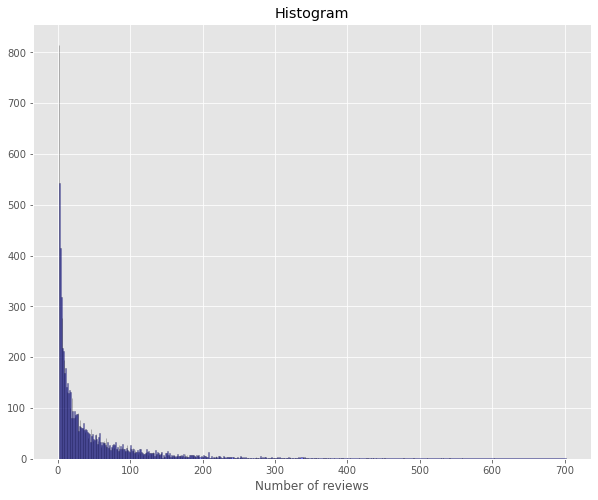

In [26]:
#### histogram ####

# TODO => create round values to be used as bins' values
# number_of_reviews_per_listing['round_count'] = number_of_reviews_per_listing.reviews_count.round(-2)
# binsValues = number_of_reviews_per_listing['round_count'].unique()

plt.style.use('ggplot')
number_of_reviews_per_listing.reviews_count.hist(bins=number_of_reviews_per_listing['reviews_count'].values,color='blue', edgecolor='black', alpha=0.5, figsize=(10, 8))
plt.xlabel('Number of reviews')
plt.title("Histogram")
plt.show()


## 8.Listings per Room type

In [55]:
room = data.copy()
room = data.groupby('room_type').size().reset_index(name='listings_numbers').sort_values(['listings_numbers'], ascending=False)
room['listings_numbers(%)'] = room.listings_numbers / room.listings_numbers.sum()
room

,room_type,listings_numbers,listings_numbers(%)
0,Entire home/apt,10003,0.877764
2,Private room,1069,0.093805
1,Hotel room,250,0.021938
3,Shared room,74,0.006494


## 9.Number of listings per neighborhood and room type 

In [56]:
room2 = data.copy()
room2 = data.groupby(['neighbourhood','room_type']).size().reset_index(name='listings_numbers').sort_values(['listings_numbers'], ascending=False)
room2['listings_numbers(%)'] = room2.listings_numbers / room2.listings_numbers.sum()
room2.head(5)

,neighbourhood,room_type,listings_numbers,listings_numbers(%)
41,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,Entire home/apt,1541,0.135223
66,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,Entire home/apt,880,0.077220
82,ΝΕΟΣ ΚΟΣΜΟΣ,Entire home/apt,768,0.067392
76,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,Entire home/apt,746,0.065462
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Entire home/apt,596,0.052299


## 10.Average price per day

In [57]:
calendar['date'] = pd.to_datetime(calendar['date'])
days = calendar.date.dt.dayofweek
calendar['day'] = days
calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,day
0,572435,2020-01-14,t,202,$202.00,3.0,21.0,1
1,10595,2020-01-14,t,50,$50.00,1.0,45.0,1
2,10595,2020-01-15,t,50,$50.00,1.0,45.0,2
3,10595,2020-01-16,t,50,$50.00,1.0,45.0,3
4,10595,2020-01-17,t,50,$50.00,2.0,45.0,4


In [45]:
calendar['price'] = calendar['price'].str.replace('\.[^.]*$','',regex=True).str.replace('\,[^,]*$','',regex=True).str.replace('$', '')
calendar["price"] = calendar["price"].fillna(0).astype(int)

In [58]:
avg_prices = calendar.groupby('day').agg(avg_price=('price','mean'))
avg_prices.round(2).head(5)

,avg_price
day,
0,62.33
1,62.13
2,62.31
3,62.41
4,63.14


## 11.Number of listings per host

In [59]:
hosts = data.groupby('host_id').size().reset_index(name='num_listings').sort_values(['num_listings'], ascending=False)
hosts.head(5)

,host_id,num_listings
2359,77457889,126
1173,29927830,100
3340,135482892,88
4127,182755179,87
72,748818,85


In [60]:
hosts['Rank'] = hosts['num_listings'].rank(axis='index',method='first',ascending=False) # axis: 0 or ‘index’ for rows 
hosts.head(5)

,host_id,num_listings,Rank
2359,77457889,126,1.0
1173,29927830,100,2.0
3340,135482892,88,3.0
4127,182755179,87,4.0
72,748818,85,5.0


## 12.Visualization using Folium

In [7]:
map = folium.Map(location=[37.98888, 23.76431], default_zoom_start=15)
folium.Marker(
    location=[37.98888, 23.76431],
    popup='Welcome to <b>ATHENS</b>',
    tooltip = "Click for more",
    icon=folium.Icon(color='blue', icon='ok-sign'),
).add_to(map)
map

In [8]:
ATHENS_COORDINATES = (37.98888, 23.76431)

MAX_RECORDS = 100

map = folium.Map(location=ATHENS_COORDINATES, max_zoom=13,zoom_start=11)
 
marker_cluster = MarkerCluster().add_to(map)
    
for i in range(0,MAX_RECORDS):
    folium.Marker(
        location = [data.iloc[i]['latitude'],data.iloc[i]['longitude']], 
        popup=data.iloc[i]['room_type'],
        tooltip = "Click for more",
        icon=folium.Icon(color='blue', icon='ok-sign'),
).add_to(marker_cluster)  # instead of adding them to the map,all the markers would be directed to the markerCluster
  
display(map)